In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from alpaca_functions import time_formatter, bullish_sequence, calculate_indicators, get_predictions, get_sentiment, bullish_candlestick_patterns
import matplotlib.pyplot as plt
import numpy as np
import time
import os

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ben/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of num

In [2]:
today = time_formatter(time.time())
start = time_formatter(time.time() - (604800 * 13))         # Trying with the last 120 ish days # 52))

# get ticker to trade
# raw_data, ticker = get_stuff_to_trade(today, start)

# ticker = "VRSK"
ticker = "AMAT"
raw_data = os.path.relpath("data/AMAT_test_data_1D_year_OCT2018-2019_2.csv")        # 1d window

# calculate indicators and stuff
indicators = calculate_indicators(raw_data, ticker)
sentiment = get_sentiment(ticker)
# get_edgar_score(indicators, ticker)

# train models
print("volume")
volume_train, volume_test = get_predictions(indicators["volume"])
print("high price")
high_train, high_test = get_predictions(indicators["high"])
print("closing price")
close_train, close_test = get_predictions(indicators["close"])
print("macd")
macd_train, macd_test = get_predictions(indicators["macd"])
signal_train, signal_test = get_predictions(indicators["signal"])
print("MFI")
mfi_train, mfi_test = get_predictions(indicators["mfi"])
print("Stochastic oscillator")
stoch_train, stoch_test = get_predictions(indicators["stoch"])

volume_test = volume_test[~np.isnan(volume_test)]
high_test = high_test[~np.isnan(high_test)]
close_test = close_test[~np.isnan(close_test)]
macd_test = macd_test[~np.isnan(macd_test)]
signal_test = signal_test[~np.isnan(signal_test)]
mfi_test = mfi_test[~np.isnan(mfi_test)]
stoch_test = stoch_test[~np.isnan(stoch_test)]

50.59 49.89 48.78
volume



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch: 1000 cost= 0.001422457
Epoch: 2000 cost= 0.000466826
Epoch: 3000 cost= 0.000220290
Epoch: 4000 cost= 0.000126239
Epoch: 5000 cost= 0.000080715
Epoch: 6000 cost= 0.000054965
Epoch: 7000 cost= 0.000038899
Epoch: 8000 cost= 0.000028231
Epoch: 9000 cost= 0.000020849
Epoch: 10000 cost= 0.000015593
Epoch: 11000 cost= 0.000011774
Epoch: 12000 cost= 0.000008955
Epoch: 13000 cost= 0.000006850
Epoch: 14000 cost= 0.000005264
Epoch: 15000 cost= 0.000004061
Epoch: 16000 cost= 0.000003143
Epoch: 17000 cost= 0.000002438
Epoch: 18000 cost= 0.000001896
Epoch: 19000 cost= 0.000001477
Epoch: 20000 cost= 0.000001153
high price
Epoch: 1000 cost= 0.000336118
Epoch: 2000 cost= 0.000323076
Epoch: 3000 cost= 0.000310710
Epoch: 4000 cost= 0.000298985
Epoch: 5000 cost= 0.000287862
Epoch: 6000 cost= 0.000277306
Epoch: 7000 cost= 0.000267286
Epoch: 8000 cost= 0.000257771
Epoch: 9000 cos

/home/ben/Projects/trading/cryptoconda/alpaca_functions.py:457: RuntimeWarning: invalid value encountered in greater
  position = 2 * ((p > 0) - .5)
/home/ben/Projects/trading/cryptoconda/alpaca_functions.py:464: RuntimeWarning: invalid value encountered in greater
  position = 2*((p>0)-.5)


Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch: 14000 cost= nan
Epoch: 15000 cost= nan
Epoch: 16000 cost= nan
Epoch: 17000 cost= nan
Epoch: 18000 cost= nan
Epoch: 19000 cost= nan
Epoch: 20000 cost= nan
MFI
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch: 14000 cost= nan
Epoch: 15000 cost= nan
Epoch: 16000 cost= nan
Epoch: 17000 cost= nan
Epoch: 18000 cost= nan
Epoch: 19000 cost= nan
Epoch: 20000 cost= nan
Stochastic oscillator
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch:

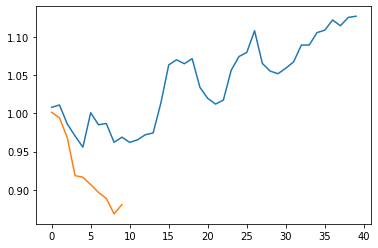

In [3]:
# close
plt.plot(np.cumprod(close_train+1), label="ass")
plt.plot(np.cumprod(close_test+1), label="dick")

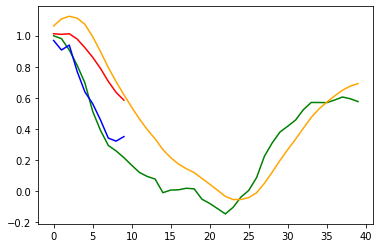

In [4]:
# macd
plt.plot(np.cumprod(macd_train+1), color="green")
plt.plot(np.cumprod(signal_train+1), color="orange")
# test
plt.plot(np.cumprod(macd_test+1), color="blue")
plt.plot(np.cumprod(signal_test+1), color="red")

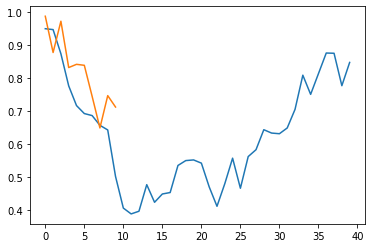

In [5]:
# MFI
plt.plot(np.cumprod(mfi_train+1))
plt.plot(np.cumprod(mfi_test+1))

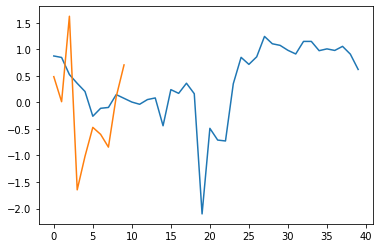

In [6]:
# stochastic oscillator  
plt.plot(np.cumprod(stoch_train+1))
plt.plot(np.cumprod(stoch_test+1))

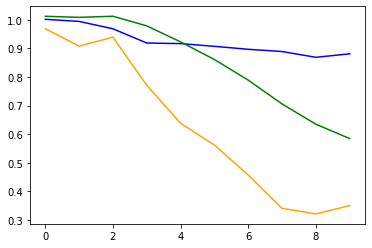

In [7]:
# macd and signal + close w/ volume
plt.plot(np.cumprod(close_test+1), color="blue")
plt.plot(np.cumprod(macd_test+1), color="orange")
plt.plot(np.cumprod(signal_test+1), color="green")
# plt.plot(np.cumprod(volume_test+1), color="black")

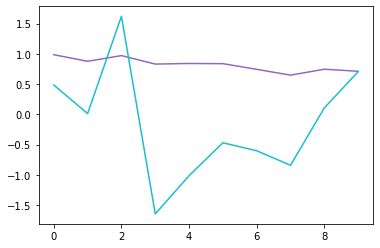

In [8]:
# stoch + mfi w/ volume
plt.plot(np.cumprod(mfi_test+1), color="#9467bd")
plt.plot(np.cumprod(stoch_test+1), color="#17becf")
# plt.plot(np.cumprod(volume_test+1), color="black")

In [9]:
print("volume test:", volume_test[-1], " current volume:", indicators["volume"].iloc[-1])
print("close test:", close_test[-1], " current close:", indicators["close"].iloc[-1])
print("macd test:", macd_test[-1], " current macd:", indicators["macd"].iloc[-1])
print("signal test:", signal_test[-1], " current signal:", indicators["signal"].iloc[-1])
print("mfi test:", mfi_test[-1], " current mfi:", indicators["mfi"].iloc[-1])
print("stoch test:", stoch_test[-1], " current stoch:", indicators["stoch"].iloc[-1])

volume test: 0.9512052650330239  current volume: 373896
close test: 0.014030867909400738  current close: 50.59
macd test: 0.09043746877897146  current macd: 0.40838110885797363
signal test: -0.07921695934969898  current signal: 0.6226543016198833
mfi test: -0.04629596297361283  current mfi: 51.429218366767365
stoch test: 5.600000000000023  current stoch: 34.59119496855361


In [10]:
print("sentiment:", sentiment)

sentiment: negative


In [11]:
print(indicators["macd"].iloc[-5:])

96     0.655145
97     0.533077
98     0.397078
99     0.374511
100    0.408381
Name: macd, dtype: float64


In [12]:
print(indicators["macd"].iloc[-1] < indicators["signal"].iloc[-1])

True


In [13]:
print(bullish_sequence(indicators["macd"].iloc[-5], indicators["macd"].iloc[-4], indicators["macd"].iloc[-3]))

True


In [14]:
print(bullish_sequence(indicators["close"].iloc[-5], indicators["close"].iloc[-4], indicators["close"].iloc[-3]))

True


In [ ]:
pattern = bullish_candlestick_patterns(indicators.iloc[-1], indicators.iloc[-2], indicators.iloc[-3])
print("Pattern: ", pattern, pattern in ["hammer", "inverseHammer"])